# Computational Learning (CIS 581)

## Project2 - Neural Networks for Hand Written Digits Classification

**Author     : Nithesh Veerappa**

**Student ID : 01883074**

### Introduction:

This project is aimed at implementing an array of Neural Network Architectures that learns to classify the **Handwritten Digits Dataset**. The data set of examples consists of images of handwwritten digits represented as a 32x32 matrix
of pixels, each pixel taking value 1 or 0 corresponding to a black or white pixel, respectively.
Neural Network Architectures: You will consider three neural network architectures as
model classes:
1. A (multi-output) perceptron with 1024 input units and 10 output units, with (gradient descent) learning rate ∈ {4^i |i = 0, 1, 2, 3, 4}, at least


2. A deep neural nework with the same number of units per hidden layer ∈ {423, 44}, networkdepth (i.e., number of hidden layers) ∈ {1, 2, 3, 4}, and (gradient descent) learning rate ∈{4^i |i = −2, −1, 0, 1, 2}, at least


3. A deep neural nework with 2 hidden layers, with the number of units in the first layer ∈ {4^3, 4^4}(connecting from the input layer), followed by a smaller number of units ∈ {4^2, 4^3} in the next layer (connecting to the output layer), and (gradient descent) learning rate ∈ {4^i |i = −3, −2, −1, 0, 1}, at least


### Source Code Descriptions:

This code is constructed with class named **NNet** with class parameters and methods essential to implement the above emtioned architectures and define all the helper functions. A brief description of the functions are described below:

**Class Constructor/__init__**: This is the contructor of the class **NNet** that parameterize the class object with parameters that are used by class methods and also loads the data set from the give input datasets.

**initialize()** : This function takes the architecture parameters (input size, output size, number of hidden layer and hidden units) and initialize a matrix of weight parameters with uniformly distributed random numbers for every hidden layer.

**dataExtract()** : This function takes as input all the data files, extracts data and load them in them in the work space for the model to access and perform training and testing.

**hotEncoding()** : This function takes the class label and converts that into a one hot encoding vector and this vectorization is performed for all data samples at once.

**sigmoid()** : This fucntion implements a sigmoid function that is applied to every output unit of a given NN architecture

**forward()** : This function performs the forward propagation task the takes every data sample and passes through every layer define by the network with activation and finally generates a probability distribution over the output space which is used to evaluate the model performace against the corresponding ground truth label and updating the weight parameters of the NN architecture for every layer.

**backprop()** : Once the predictions are obtained, This function, based on the model evaluation with respect to misclassification error, calculates the delta change required to update the weight parameters by perfoming gradient descent over proxy loss fucntion, taking into account the learning rate, iteratively layer by layer staring from output layer. This function is active once every forward pass over all data samples.

**gradient()** : Once the gradients are obtained from backprop task, this function performs optimization by updating the current weight matrix with gradient contributing to the learning process. AN import point to note is that the weights are average over all the samples.

**crossValidationSetGenerator()** : This fucntion splits the training data further intp training and validation sets to perform model evaluation over K folds on different hypothesis models. This function helps in tuning the hyperparameters and model selection with best hyperparameters.

**misClassError()** : This function implements error based on misclassification between model prediction and ground truth and aids the learning process in model selection with best hyperparameters

**proxyError()** : This fucntion function implements proxy error used for learning is the mean squared error: that is, the average (over the samples) of the avergage (over the otuput units) of half of the squared error.

**modelEvaluate()** : This function evaluates the model performance on test as well as training datasets by performing forward propagation of all data samples with current learned weights and evaluates the prediction against true labels. This function uses both misclassification and proxy errors.

**predict()** : This function takes the best parameters obtained after k-fold cross validation step and reinitialize all the weights and retrains the entire model over all training samples for the given iteration size to build the final model that has actually learned to classify the hand written digits. Once the training is complete this function is runs through the test data to evaluate the model performace once again but this time of the model trained on all training samples unlike CV step.

**plotError()** : This function plots training and validation errors ( both misclassfication and proxy error) during model selection and model retraining processes and gives a visual interpretation of the learning curve of the model in each process.

**evaluateTrial()** : This function test the model training on few sample extracted from dataset to check the predictions made by the model after training.

**model1(), model2(), model3()** : These are the functions where all functions defined above come together to implement, train, hyperparameter tuning, test and evaluate different NN achitectures described in the problem statement with differemt hyperparameters defined for learning rate, hidden layers and hidden units to learn the best set of parameters from. The workflow of these functions is the same and is described below,

    - Looping over hyperparameters
    
    - Initialize Weights
    
    - Looping over K Folds
    
    - Cross validation data set generation
    
    - Forward propagation
    
    - Backward propagation and Gradient descent
    
    - Plot Training and Validation errors during model selection process
    
    - Selection of best hyper parameters
    
    - Model Retraining with best hyperparameter
    
    - Model evaluation against test data set and plotting errors
    
    - Model prediction over trial samples
    

### Source Code in Python:

In [1]:
"""
Created on Thu Apr  6 20:13:05 2023

@author: NitheshV
"""

import numpy as np
import warnings
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
rng = np.random.default_rng()
warnings.filterwarnings('ignore')
np.random.seed(seed=1)
file = ['optdigits_train.dat', 'optdigits_test.dat', 'optdigits_trial.dat']

class NNet:
    def __init__(self, inSize, outSize, file = file, k = 3):
        self.inSize = inSize
        self.outSize = outSize
        self.weights, self.out, self.delta = {}, {}, {}
        self.x_train, self.y_train = self.dataExtract(file[0])
        self.x_test, self.y_test = self.dataExtract(file[1])
        self.x_trial, self.y_trial = self.dataExtract(file[2])
        self.k = k
        self.ksize = int(len(self.x_train)/self.k)
        self.yhat = []
        self.outLayer = None
        self.xtrain, self.ytrain = [],[]
    
    
    def initialize(self, hidL, hidU):
        self.weights = {}
        hidL = range(1,hidL+1)
        currXsize = self.inSize
        if len(hidL) != 0 and hidU:
            for l,n in zip(hidL, hidU):
                w = np.random.uniform(-1,1,(currXsize,n))
                b = np.random.uniform(-1,1, n)
                self.weights[l] = np.vstack((w,b))
                currXsize = n
        w = np.random.uniform(-1,1,(currXsize, self.outSize))
        b = np.random.uniform(-1,1, self.outSize)
        self.weights[len(hidL) + 1] = np.vstack((w,b))
        self.outLayer = len(self.weights)
        
        
    def dataExtract(self, file):
        with open(file, 'r') as f:
            data = f.readlines()
        f.close()
        data = np.vstack([np.array(x.split(), dtype = 'int') for x in data])
        return data[:,:-1], data[:,-1]
    
    
    def hotEncoding(self, y):
        outOH = []
        for yo in y:
            out = np.zeros(self.outSize)
            out[yo] = 1
            outOH.append(out)
        return outOH
    
    
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    

    def forward(self,x):
        currX = x
        b = np.array([1]*len(x)).reshape(len(x),1)
        for k,w in self.weights.items():
            currY = np.dot(currX, w[:-1,:]) + w[-1,:]
            if k < self.outLayer:
                currX = self.sigmoid(currY)
                self.out[k] = np.concatenate((currX, b), axis=1)
            else:
                currX = self.sigmoid(currY)
                self.out[k] = currX  
        self.out[0] = np.concatenate((x, b), axis=1)
    

    def backprop(self, y):
        layer = self.outLayer
        y = self.hotEncoding(y)
        self.delta[layer] = np.multiply(np.multiply(self.out[layer],(1 - self.out[layer])),(self.out[layer] - np.array(y)))
        while layer > 1:
            currW = self.weights[layer]
            temp1 = np.multiply(self.out[layer-1],(1 - self.out[layer-1]))
            if layer == len(self.weights):
                temp2 = np.matmul(self.delta[layer], currW.T)
            else:
                temp2 = np.matmul(self.delta[layer][:,:-1], currW.T)
            self.delta[layer-1] = np.multiply(temp1 , temp2)
            layer -=1
      
    
    def gradient(self,lr,y): 
        self.backprop(y)
        m = len(y)
        for k,w in self.weights.items():
            if k < self.outLayer:
                dw = lr*np.matmul(self.out[k-1].T, self.delta[k][:,:-1])/m
                self.weights[k] -= dw
            else:
                dw = lr*np.matmul(self.out[k-1].T, self.delta[k])/m
                self.weights[k] -= dw
                
    
    def crossValidationSetGenerator(self,i,x,y):
        if i < self.k-1:
            self.xtrain = np.delete(x, np.s_[self.ksize*i:self.ksize*(i+1)],0)
            self.ytrain = np.delete(y, np.s_[self.ksize*i:self.ksize*(i+1)],0)
            self.xval = x[self.ksize*i:self.ksize*(i+1),:]
            self.yval = y[self.ksize*i:self.ksize*(i+1)]
        else:
            self.xtrain = np.delete(x, np.s_[self.ksize*i:],0)
            self.ytrain = np.delete(y, np.s_[self.ksize*i:],0)
            self.xval = x[self.ksize*i:, :]
            self.yval = y[self.ksize*i:]
         
        
    def misClassError(self,y, yhat):
        err = np.sum(y != yhat)/len(y)
        return err
    
    
    def proxyError(self,y,yhat):
        y = self.hotEncoding(y)
        return 0.5*np.mean(np.mean(np.power((y - yhat),2), axis = 1))
    
    
    def modelEvaluate(self,x,y):
        self.forward(x)
        yhat = self.out[self.outLayer]
        y_pred = np.argmax(yhat, axis = 1)
        return [self.misClassError(y, y_pred), self.proxyError(y,yhat)]
    
    
    def predict(self, bestHypSet, modellayout, hyperSet, epochs):
        l, u , lr = bestHypSet
        self.ValErr, self.TrainErr = [],[]
        if l == 1 or l == 0:
            self.initialize(int(l), [int(u)]*int(l))
        else:
            self.initialize(int(l), [int(u[0]),int(u[1])])
        for epoch in range(epochs):
            self.forward(self.x_train)
            self.gradient(lr, self.y_train)
            self.TrainErr.append(self.modelEvaluate(self.x_train, self.y_train))
            self.ValErr.append(self.modelEvaluate(self.x_test, self.y_test))
            
        print('--> Training Errors(MisClassification and Proxy) with Best Model Table:')
        print('------------------------------------------')
        print ("{:<8} : {:<6} : {:<10}".format('Sample #','MCErr', 'ProxyErr'))
        print('------------------------------------------')
        for i in range(len(self.TrainErr)):
            print ("{:<8} : {:.4f} : {:<17}".format(i, self.TrainErr[i][0],self.TrainErr[i][1]))
        print('------------------------------------------')
        print('\n')
        print('--> Testing Errors(MisClassification and Proxy) with Best Model Table:')
        print('------------------------------------------')
        print ("{:<8} : {:<6} : {:<10}".format('Sample #','MCErr', 'ProxyErr'))
        print('------------------------------------------')
        for i in range(len(self.ValErr)):
            print ("{:<8} : {:.4f} : {:<17}".format(i, self.ValErr[i][0],self.ValErr[i][1]))
        print('------------------------------------------')
        
        self.plotError(hyperSet, epochs,modellayout, retrain = True)
        TrainMisClassErr,TrainProxyErr = self.modelEvaluate(self.x_train, self.y_train)
        print('\n ==> Trained Model Performance:')
        print('Training Errors after Model selection:')
        print('Misclassification Error:',TrainMisClassErr)
        print('Proxy Error:', TrainProxyErr)
        print('\n')
        TestMisClassErr,TestProxyErr = self.modelEvaluate(self.x_test, self.y_test)
        print('Test Errors after Model selection:')
        print('Misclassification Error:',TestMisClassErr)
        print('Proxy Error:', TestProxyErr)
        print('\n')
        

    def plotError(self, hyperSet, epochs, modellayout, retrain = False):
        if retrain ==False:
            xaxis = hyperSet
            fig, ax = plt.subplots()
            fig1, ax1 = plt.subplots()
            fig.tight_layout()
            fig1.tight_layout()
            fig1.dpi, fig.dpi = 500, 500
            if type(hyperSet[0]) != str:
                ax.set_xlabel('Learning Rate')
                ax1.set_xlabel('Learning Rate')
                ax.set_xscale('log',base=4)
                ax1.set_xscale('log',base=4)
            else:
                ax.set_xlabel('HyperParameters:')
                ax1.set_xlabel('HyperParameters:')
                fig.subplots_adjust(bottom=0.5)
                fig1.subplots_adjust(bottom=0.5)
                ax.set_xticklabels(hyperSet, fontsize = 4, rotation = 90)
                ax1.set_xticklabels(hyperSet, fontsize = 4, rotation = 90)
            
            ax.set_title('Training and Validation Misclassification losses (Model Selection/CV) \n {}'.format(modellayout))
            ax1.set_title('Training and Validation Proxy Error (Model Selection/CV) \n {}'.format(modellayout))
        else:
            xaxis = np.arange(1,epochs+1)
            fig, ax = plt.subplots()
            ax.set_xlabel('Epochs')
            fig1, ax1 = plt.subplots()
            ax1.set_xlabel('Epochs')
            ax.set_title('Training and Validation Misclassification losses(Retrained Best Model) \n {}'.format(modellayout))
            ax1.set_title('Training and Validation Proxy Error(Retrained Best Model) \n {}'.format(modellayout))
        
        ax.plot(xaxis, np.array(self.ValErr)[:,0],'r--', label = "Validation")
        ax.plot(xaxis, np.array(self.TrainErr)[:,0],'y', label = "Training")
        ax.legend()
        ax.set_ylabel('Losses')
        
        ax1.plot(xaxis, np.array(self.ValErr)[:,1],'r--', label = "Validation")
        ax1.plot(xaxis, np.array(self.TrainErr)[:,1],'y', label = "Training")
        ax1.legend()
        ax1.set_ylabel('Losses')
        
     
    def evaluateTrial(self):
        self.forward(self.x_trial)
        yhat = self.out[self.outLayer]
        y_pred = np.argmax(yhat, axis = 1)
        print('==> Trial Data Prediction Table:')
        print('------------------------------------------')
        print ("{:<6} : {:<5}".format('Label','Prediction'))
        print('------------------------------------------')
        for i in range(len(y_pred)):
            print ("{:.4f} : {:.4f}".format(self.y_trial[i],y_pred[i]))
        print('------------------------------------------')
        
        
    def model1(self,params, epochs):
        hidL = params['hidL']
        hidU = params['hidU']
        hyperSet = params['lr']
        errTrain = []
        errTest = []
        self.TrainErr = []
        self.ValErr = []
        print('==> Model Selection......')
        for lr in hyperSet:
            start = time.time()
            for k in range(self.k):
                self.initialize(hidL, hidU)
                for epoch in range(epochs):
                    self.crossValidationSetGenerator(k, self.x_train, self.y_train)
                    self.forward(self.xtrain)
                    self.gradient(lr, self.ytrain)
                errTrain.append(self.modelEvaluate(self.xtrain, self.ytrain))
                errTest.append(self.modelEvaluate(self.xval, self.yval))
            self.TrainErr.append(np.mean(errTrain, axis = 0))
            self.ValErr.append(np.mean(errTest, axis = 0))
            errTrain = []
            errTest = []
            end = time.time()
            print('--> CV with hyperparameters [Alpha]:', lr)
            print('--> Time taken to complete above model training:{}'.format(end-start))
            print('\n')
        bestlr = hyperSet[np.argmin(np.array(self.ValErr)[:,0])]
        modellayout = 'Alpha* : ' + str(bestlr) 
        print('************************************************************************************')
        print('Best Learning Rate:', bestlr)
        print('************************************************************************************')
        print('\n')
        print('Model Selection is complete !!!!')
        print('\n')
        print('==> Model Retraining and Prediction.....')
        self.plotError(hyperSet,epochs, modellayout, retrain = False)
        self.predict([0, 0, bestlr],modellayout,hyperSet, epochs)
        self.evaluateTrial()
        print('==> Model Retraining and Predictions are complete!!!!')
        

    def model2(self,params, epochs):
        hidL = params['hidL']
        hidU = params['hidU']
        learningRate = params['lr']
        self.TrainErr = {}
        self.ValErr = {}
        print('==> Model Selection......')
        for l in hidL:
            for u in hidU:
                for lr in learningRate:
                    start = time.time()
                    errTrain = []
                    errTest = []
                    for k in range(self.k):
                        self.initialize(l, [u]*l)
                        for epoch in range(epochs):
                            self.crossValidationSetGenerator(k, self.x_train, self.y_train)
                            self.forward(self.xtrain)
                            self.gradient(lr, self.ytrain)
                        errTrain.append(self.modelEvaluate(self.xtrain, self.ytrain))
                        errTest.append(self.modelEvaluate(self.xval, self.yval))
                    end = time.time()
                    key = str(l)+','+str(u)+','+str(lr)
                    print('--> CV with hyperparameters[Layers, Units, Alpha]:', key)
                    print('--> Time taken to complete above model training:{}'.format(end-start))
                    print('\n')
                    self.TrainErr[key]  = np.mean(errTrain, axis = 0)
                    self.ValErr[key] = np.mean(errTest, axis = 0) 
        TrainKeys = self.TrainErr.keys()
        keys = np.array([Keys.split(',') for Keys in TrainKeys], dtype = 'float32')
        hyperSet = list(self.TrainErr.keys())
        self.TrainErr = np.array(list(self.TrainErr.values()))
        self.ValErr = np.array(list(self.ValErr.values()))
        bestL, bestU, bestLR = keys[np.argmin(self.ValErr[:,0])]
        modellayout = 'Alpha* : ' + str(bestLR) + ' , ' + 'L* : ' + str(bestL) +' , '+ 'U* : ' + str(bestU)
        print('************************************************************************************')
        print('Best Hyper Parameters: Hidden Layers - {}, Hidden Units - {}, Learning Rate - {}'.format(bestL, bestU, bestLR))
        print('************************************************************************************')
        print('\n')
        print('==> Model Retraining and Prediction.....')
        self.plotError(hyperSet,epochs, modellayout, retrain = False)
        self.predict([bestL, bestU, bestLR],modellayout,hyperSet, epochs)
        self.evaluateTrial()
        print('==> Model Retraining and Predictions are complete!!!!')
        

    def model3(self,params, epochs):
        hidL = params['hidL']
        hidU = params['hidU']
        learningRate = params['lr']
        self.TrainErr = {}
        self.ValErr = {}
        print('==> Model Selection......')
        for u1 in hidU[0]:
            for u2 in hidU[1]:
                for lr in learningRate:
                    start = time.time()
                    errTrain = []
                    errTest = []
                    for k in range(self.k):
                        self.initialize(hidL, [u1,u2])
                        for epoch in range(epochs):
                            self.crossValidationSetGenerator(k, self.x_train, self.y_train)
                            self.forward(self.xtrain)
                            self.gradient(lr, self.ytrain)
                        errTrain.append(self.modelEvaluate(self.xtrain, self.ytrain))
                        errTest.append(self.modelEvaluate(self.xval, self.yval))
                    end = time.time()
                    key = str(u1)+','+str(u2)+','+str(lr)
                    print('--> CV with hyperparameters [HidU1, HidU2, Alpha]:', key)
                    print('--> Time taken to complete above model training:{}'.format(end-start))
                    print('\n')
                    self.TrainErr[key]  = np.mean(errTrain, axis = 0)
                    self.ValErr[key] = np.mean(errTest, axis = 0)          
        TrainKeys = self.TrainErr.keys()
        keys = np.array([Keys.split(',') for Keys in TrainKeys], dtype = 'float32')
        hyperSet = list(self.TrainErr.keys())
        self.TrainErr = np.array(list(self.TrainErr.values()))
        self.ValErr = np.array(list(self.ValErr.values()))
        bestU1, bestU2, bestLR = keys[np.argmin(self.ValErr[:,0])]
        modellayout = 'Alpha* : ' + str(bestLR) + ' , ' + 'U1* : ' + str(bestU1) +' , '+ 'U2* : ' + str(bestU2)
        print('************************************************************************************')
        print('Best Hyper Parameters: Hidden1 Units - {}, Hidden2 Units - {}, Learning Rate - {}'.format(bestU1, bestU2, bestLR))
        print('************************************************************************************')
        print('\n')
        print('==> Model Retraining and Prediction.....')
        self.plotError(hyperSet, epochs, modellayout, retrain = False)
        self.predict([2, [bestU1, bestU2], bestLR],modellayout,hyperSet, epochs)
        self.evaluateTrial()

### Model 1: Perceptron with no hidden layer

 Model Architecture: 1


==> Model Selection......
--> CV with hyperparameters [Alpha]: 1
--> Time taken to complete above model training:35.95848202705383


--> CV with hyperparameters [Alpha]: 4
--> Time taken to complete above model training:38.14536380767822


--> CV with hyperparameters [Alpha]: 16
--> Time taken to complete above model training:34.35173177719116


--> CV with hyperparameters [Alpha]: 64
--> Time taken to complete above model training:43.39116287231445


--> CV with hyperparameters [Alpha]: 256
--> Time taken to complete above model training:25.7922580242157


************************************************************************************
Best Learning Rate: 4
************************************************************************************


Model Selection is complete !!!!


==> Model Retraining and Prediction.....
--> Training Errors(MisClassification and Proxy) with Best Model Table:
------------------------------------------
Sample # : MCErr  : ProxyE

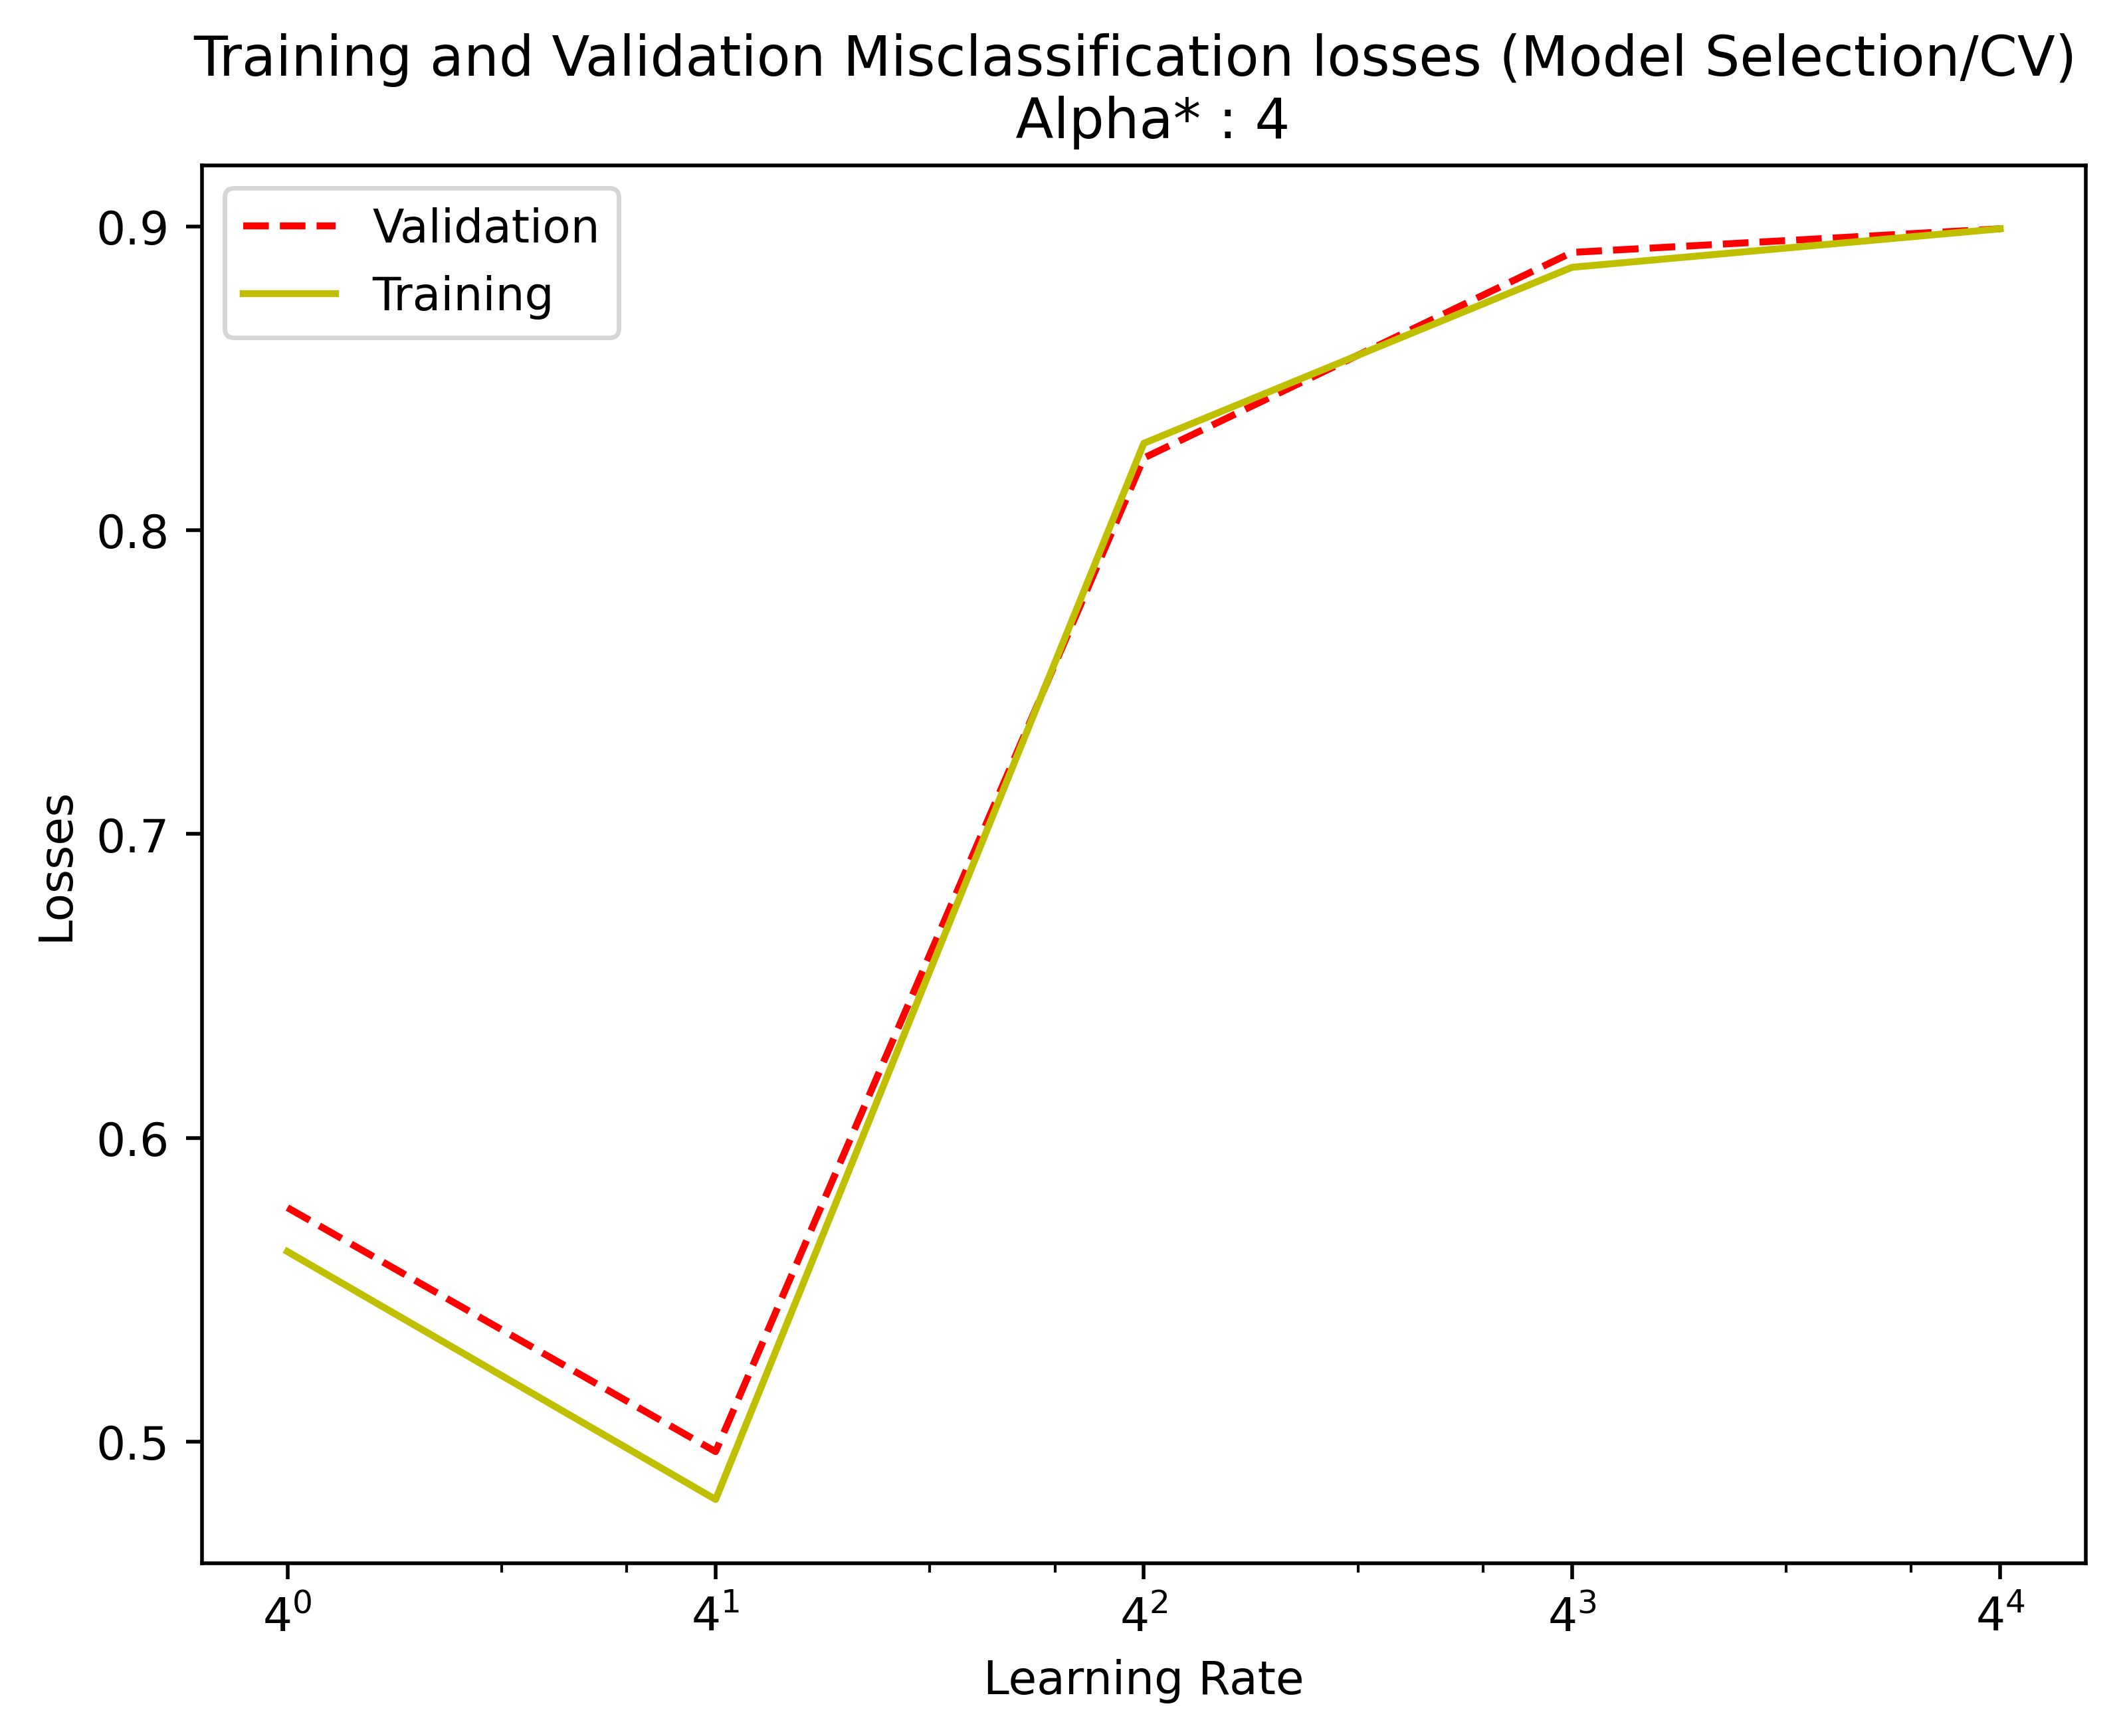

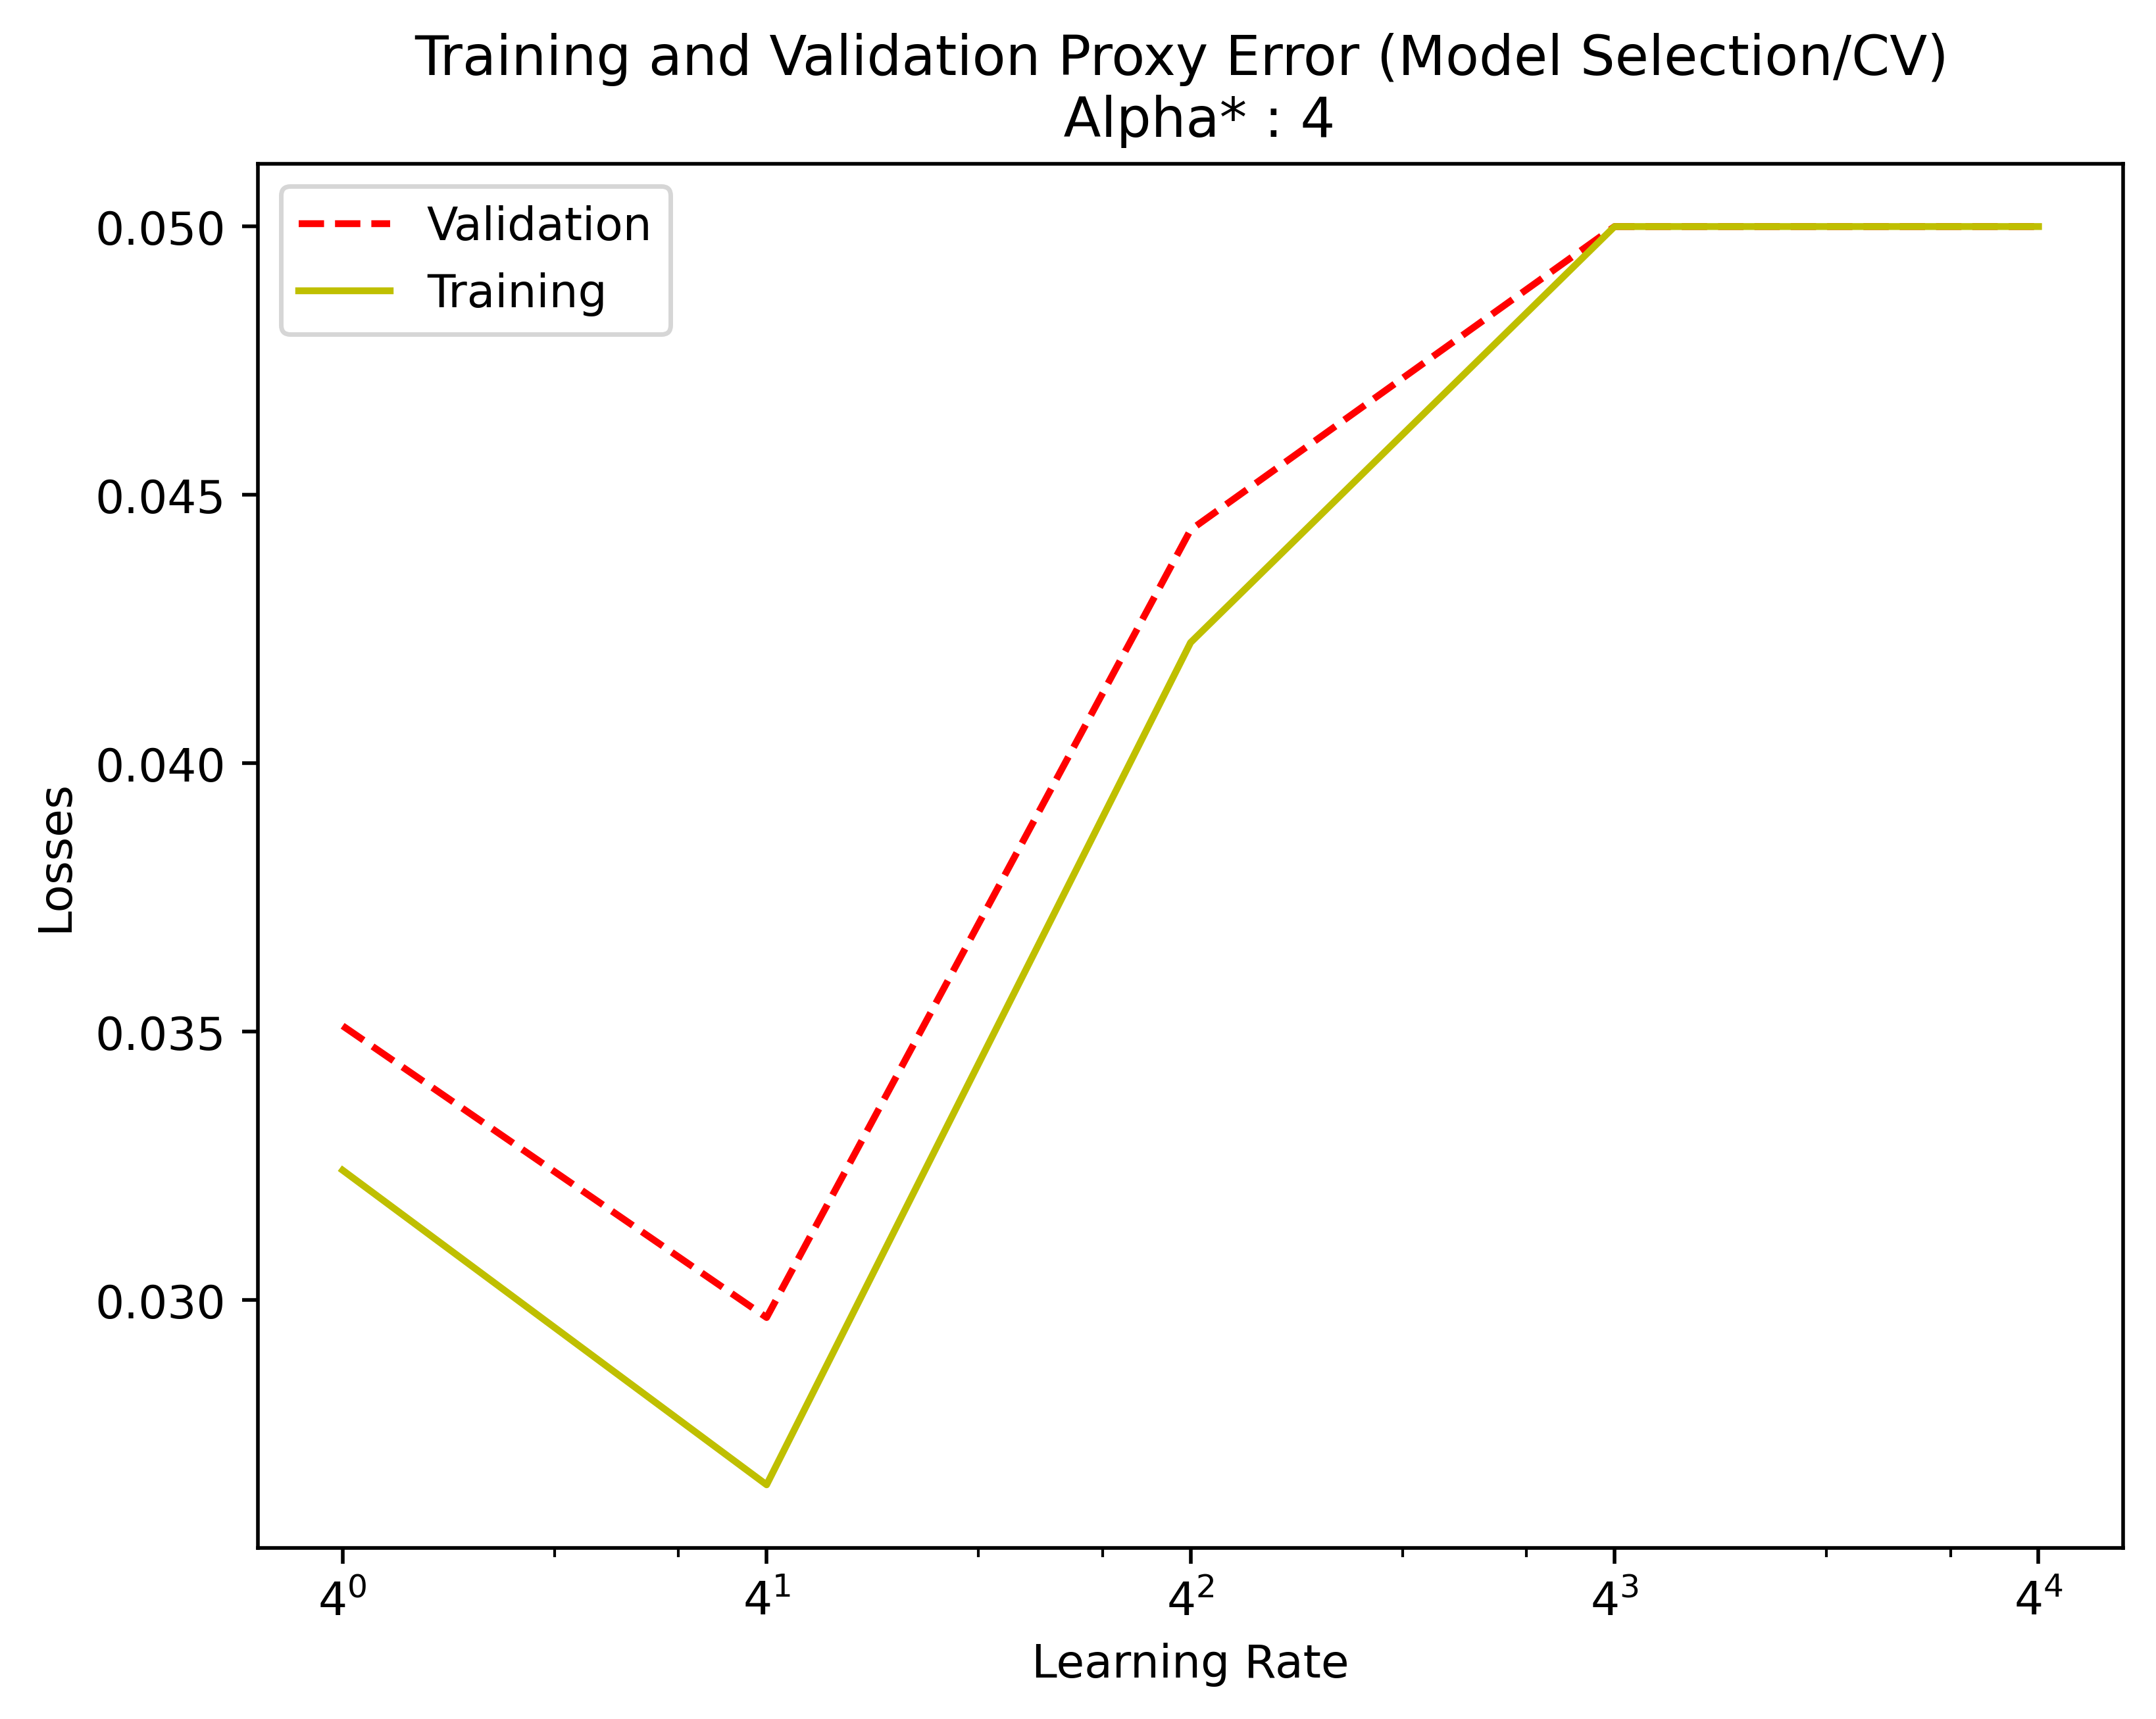

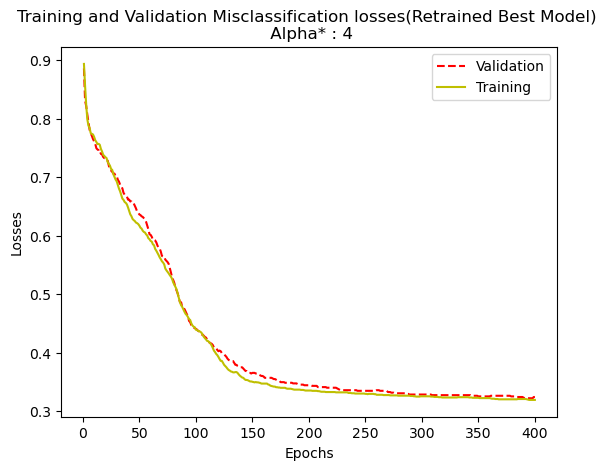

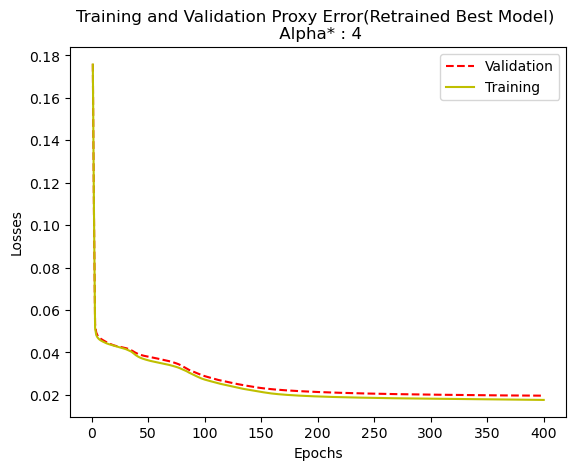

In [2]:
start = time.time()
model = NNet(1024,10)
model1Params = {'lr':[1, 4**1, 4**2, 4**3, 4**4],'hidL': 0 ,'hidU':None}

print('=========================================================================')
print(' Model Architecture: 1')
print('=========================================================================')
print('\n')
model.model1(model1Params, epochs = 1000)

end = time.time()
print('\n Total Time Elapsed in training Model1:', end-start)
print('\n ==> Plotting Results !!!!')

#### Results and Conclusion of Model 1  

The learning curve and results for model 1 is printed above.

- The best learning rate is 4 and the inference is that lower learning rate and yet optimal result in better accuracy than higher learning rates.

- The model is trained for 300 iterations and the performance appears to be subpar, underperforming and learning stagnating with only 56% accuracy based on misclassification error (~56%) due to the low complexity of the model to learn and capture all the features and non-linearity of the Shand written digits. This is also evident when the model is tested against Trial samples.

- Increasing the numbers of epochs would result in overfitting of the model over the training smaples redenring the model not fit for unseen data.

- Two ways to increase the model performace are by increasing the training samples and increasing the complexity of model by adding hidden layers. 

### Model 2: Multi-Layer Perceptron with deep network

 Model Architecture: 2


==> Model Selection......
--> CV with hyperparameters[Layers, Units, Alpha]: 1,16,0.0625
--> Time taken to complete above model training:22.210158586502075


--> CV with hyperparameters[Layers, Units, Alpha]: 1,16,0.25
--> Time taken to complete above model training:22.178356409072876


--> CV with hyperparameters[Layers, Units, Alpha]: 1,16,1
--> Time taken to complete above model training:17.158304691314697


--> CV with hyperparameters[Layers, Units, Alpha]: 1,16,4
--> Time taken to complete above model training:17.486474990844727


--> CV with hyperparameters[Layers, Units, Alpha]: 1,16,16
--> Time taken to complete above model training:23.313505172729492


--> CV with hyperparameters[Layers, Units, Alpha]: 1,64,0.0625
--> Time taken to complete above model training:25.29632043838501


--> CV with hyperparameters[Layers, Units, Alpha]: 1,64,0.25
--> Time taken to complete above model training:24.447156190872192


--> CV with hyperparameters[Layers, Units, A

--> Training Errors(MisClassification and Proxy) with Best Model Table:
------------------------------------------
Sample # : MCErr  : ProxyErr  
------------------------------------------
0        : 0.9043 : 0.06470136670269827
1        : 0.8940 : 0.049749334644717993
2        : 0.8754 : 0.04736223834674894
3        : 0.8563 : 0.04629471202971997
4        : 0.8376 : 0.045623516760672674
5        : 0.8221 : 0.04511648528524665
6        : 0.8035 : 0.04468781389601305
7        : 0.7787 : 0.04429838708697579
8        : 0.7611 : 0.043927384272459964
9        : 0.7466 : 0.04356240211934345
10       : 0.7353 : 0.04319557732090196
11       : 0.7146 : 0.04282184207839755
12       : 0.7006 : 0.04243805591910187
13       : 0.6898 : 0.042042591003245
14       : 0.6789 : 0.041635160162521265
15       : 0.6649 : 0.04121666611899927
16       : 0.6474 : 0.040788898270535105
17       : 0.6386 : 0.040354110405497724
18       : 0.6194 : 0.03991469360411231
19       : 0.6091 : 0.03947305990127726
20     

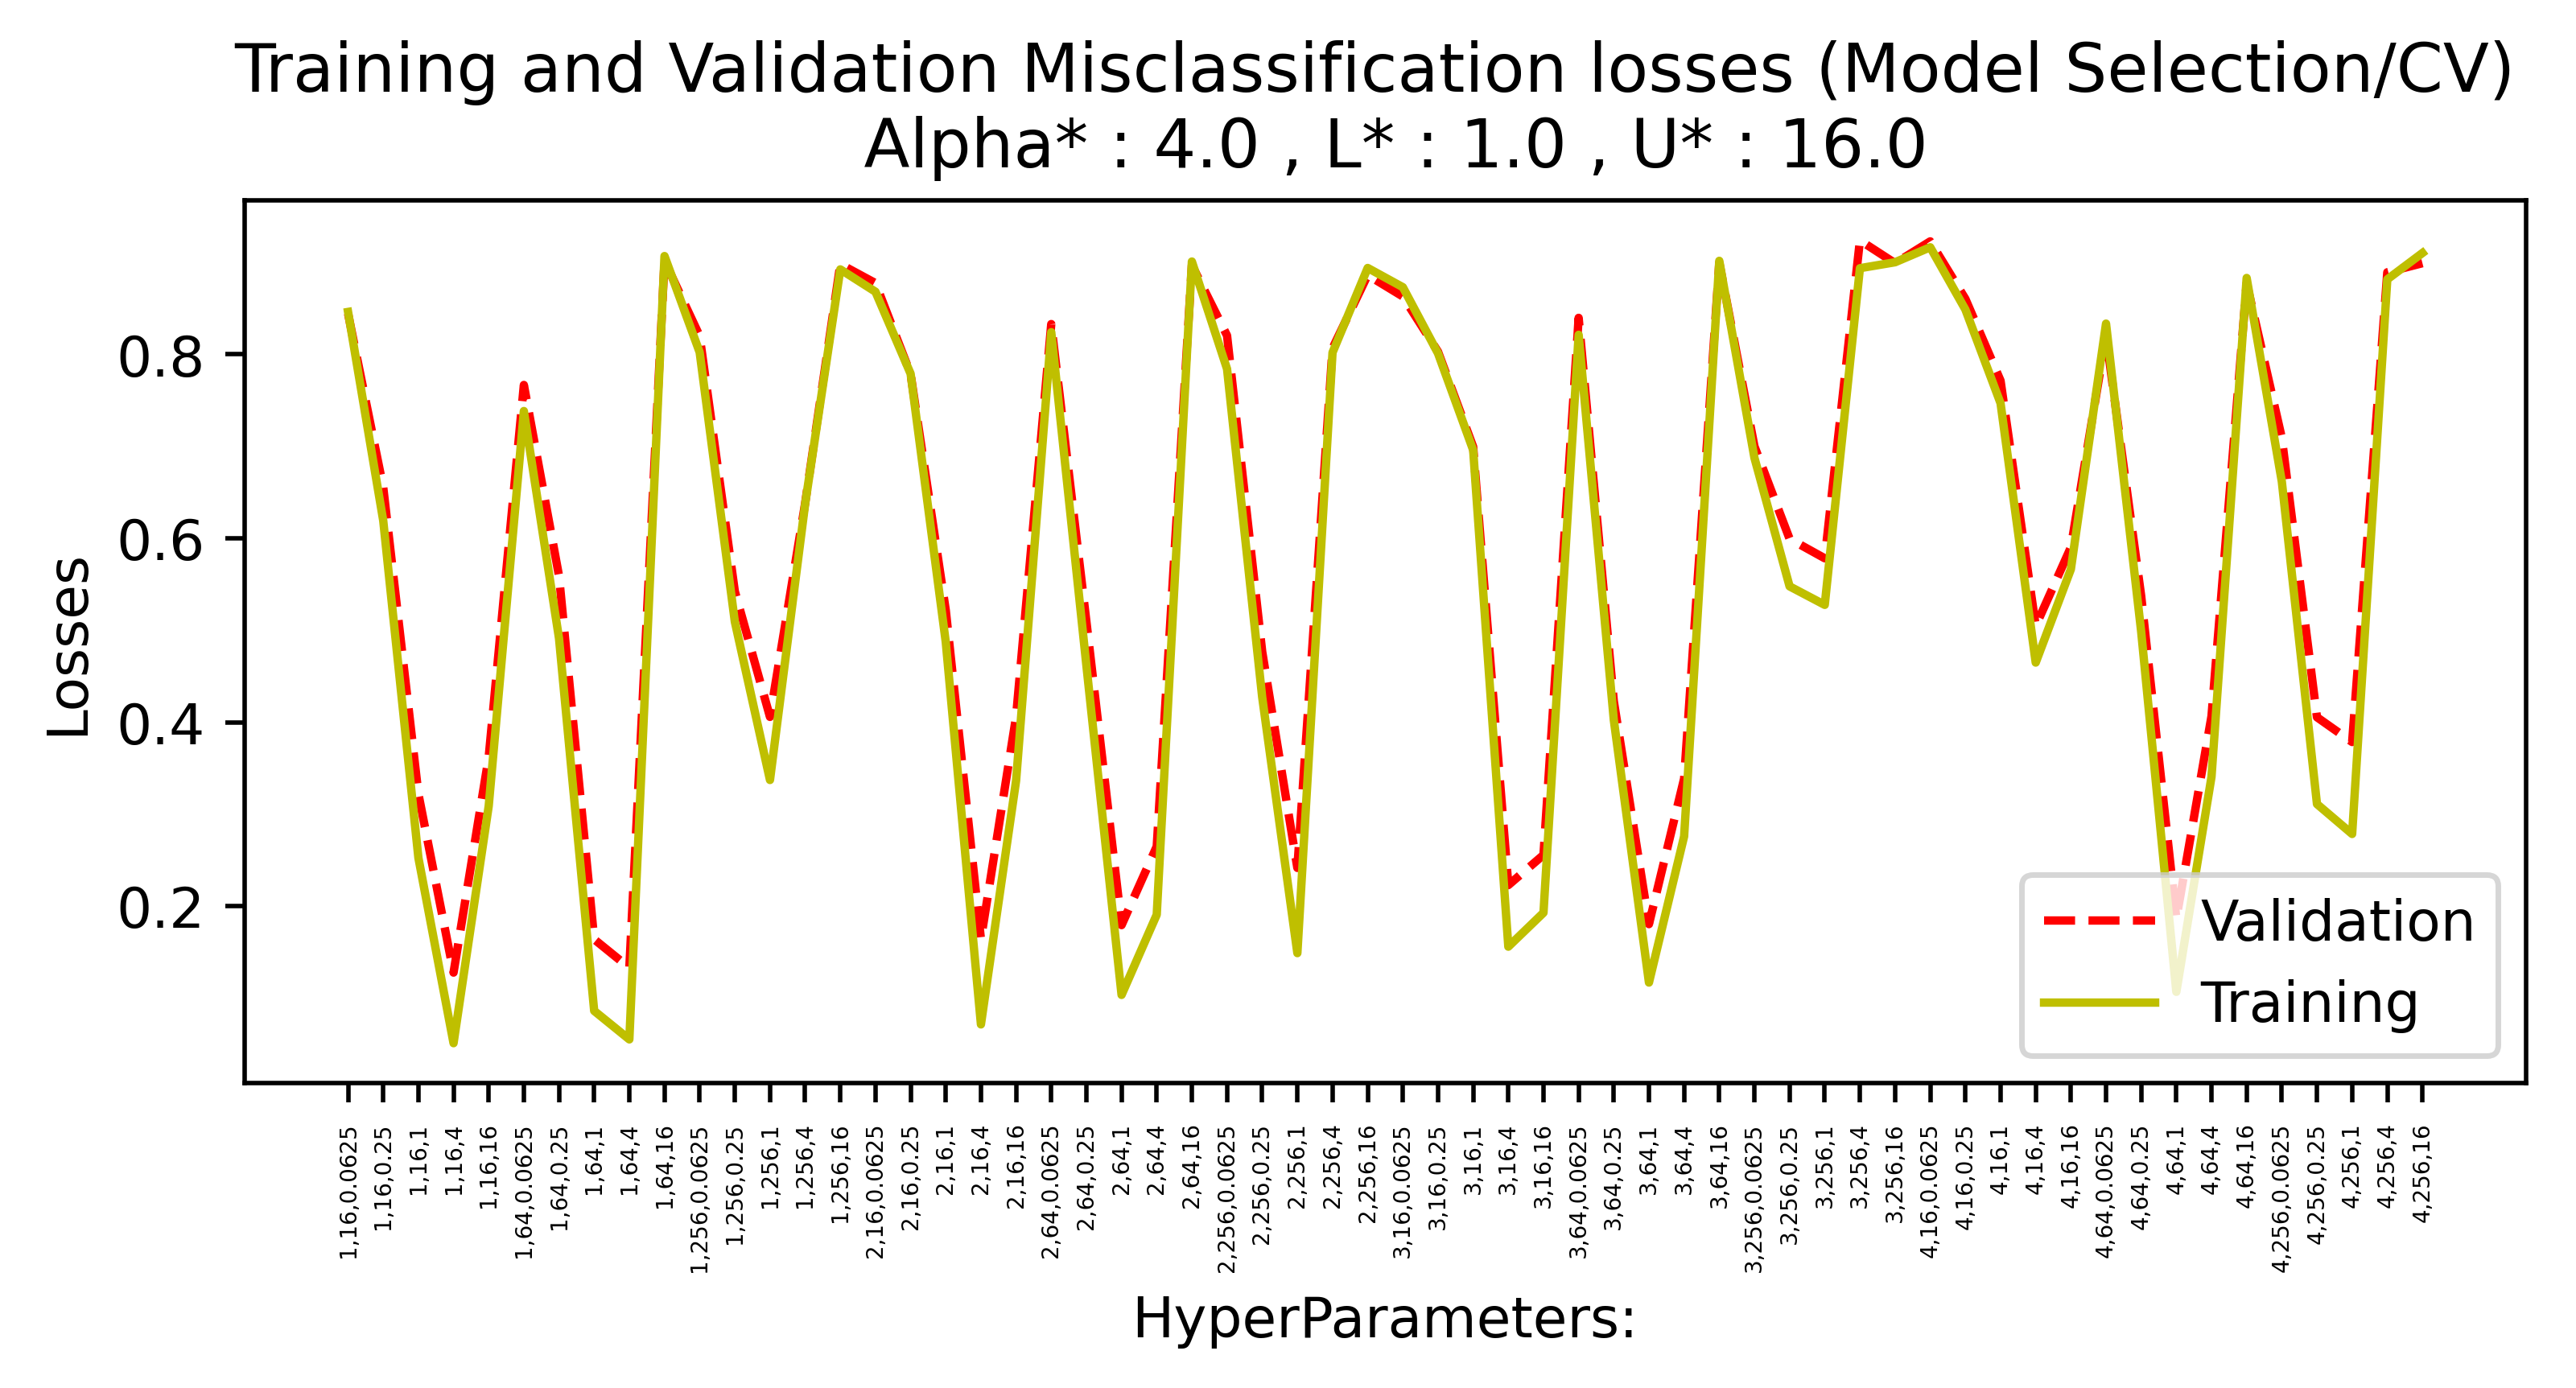

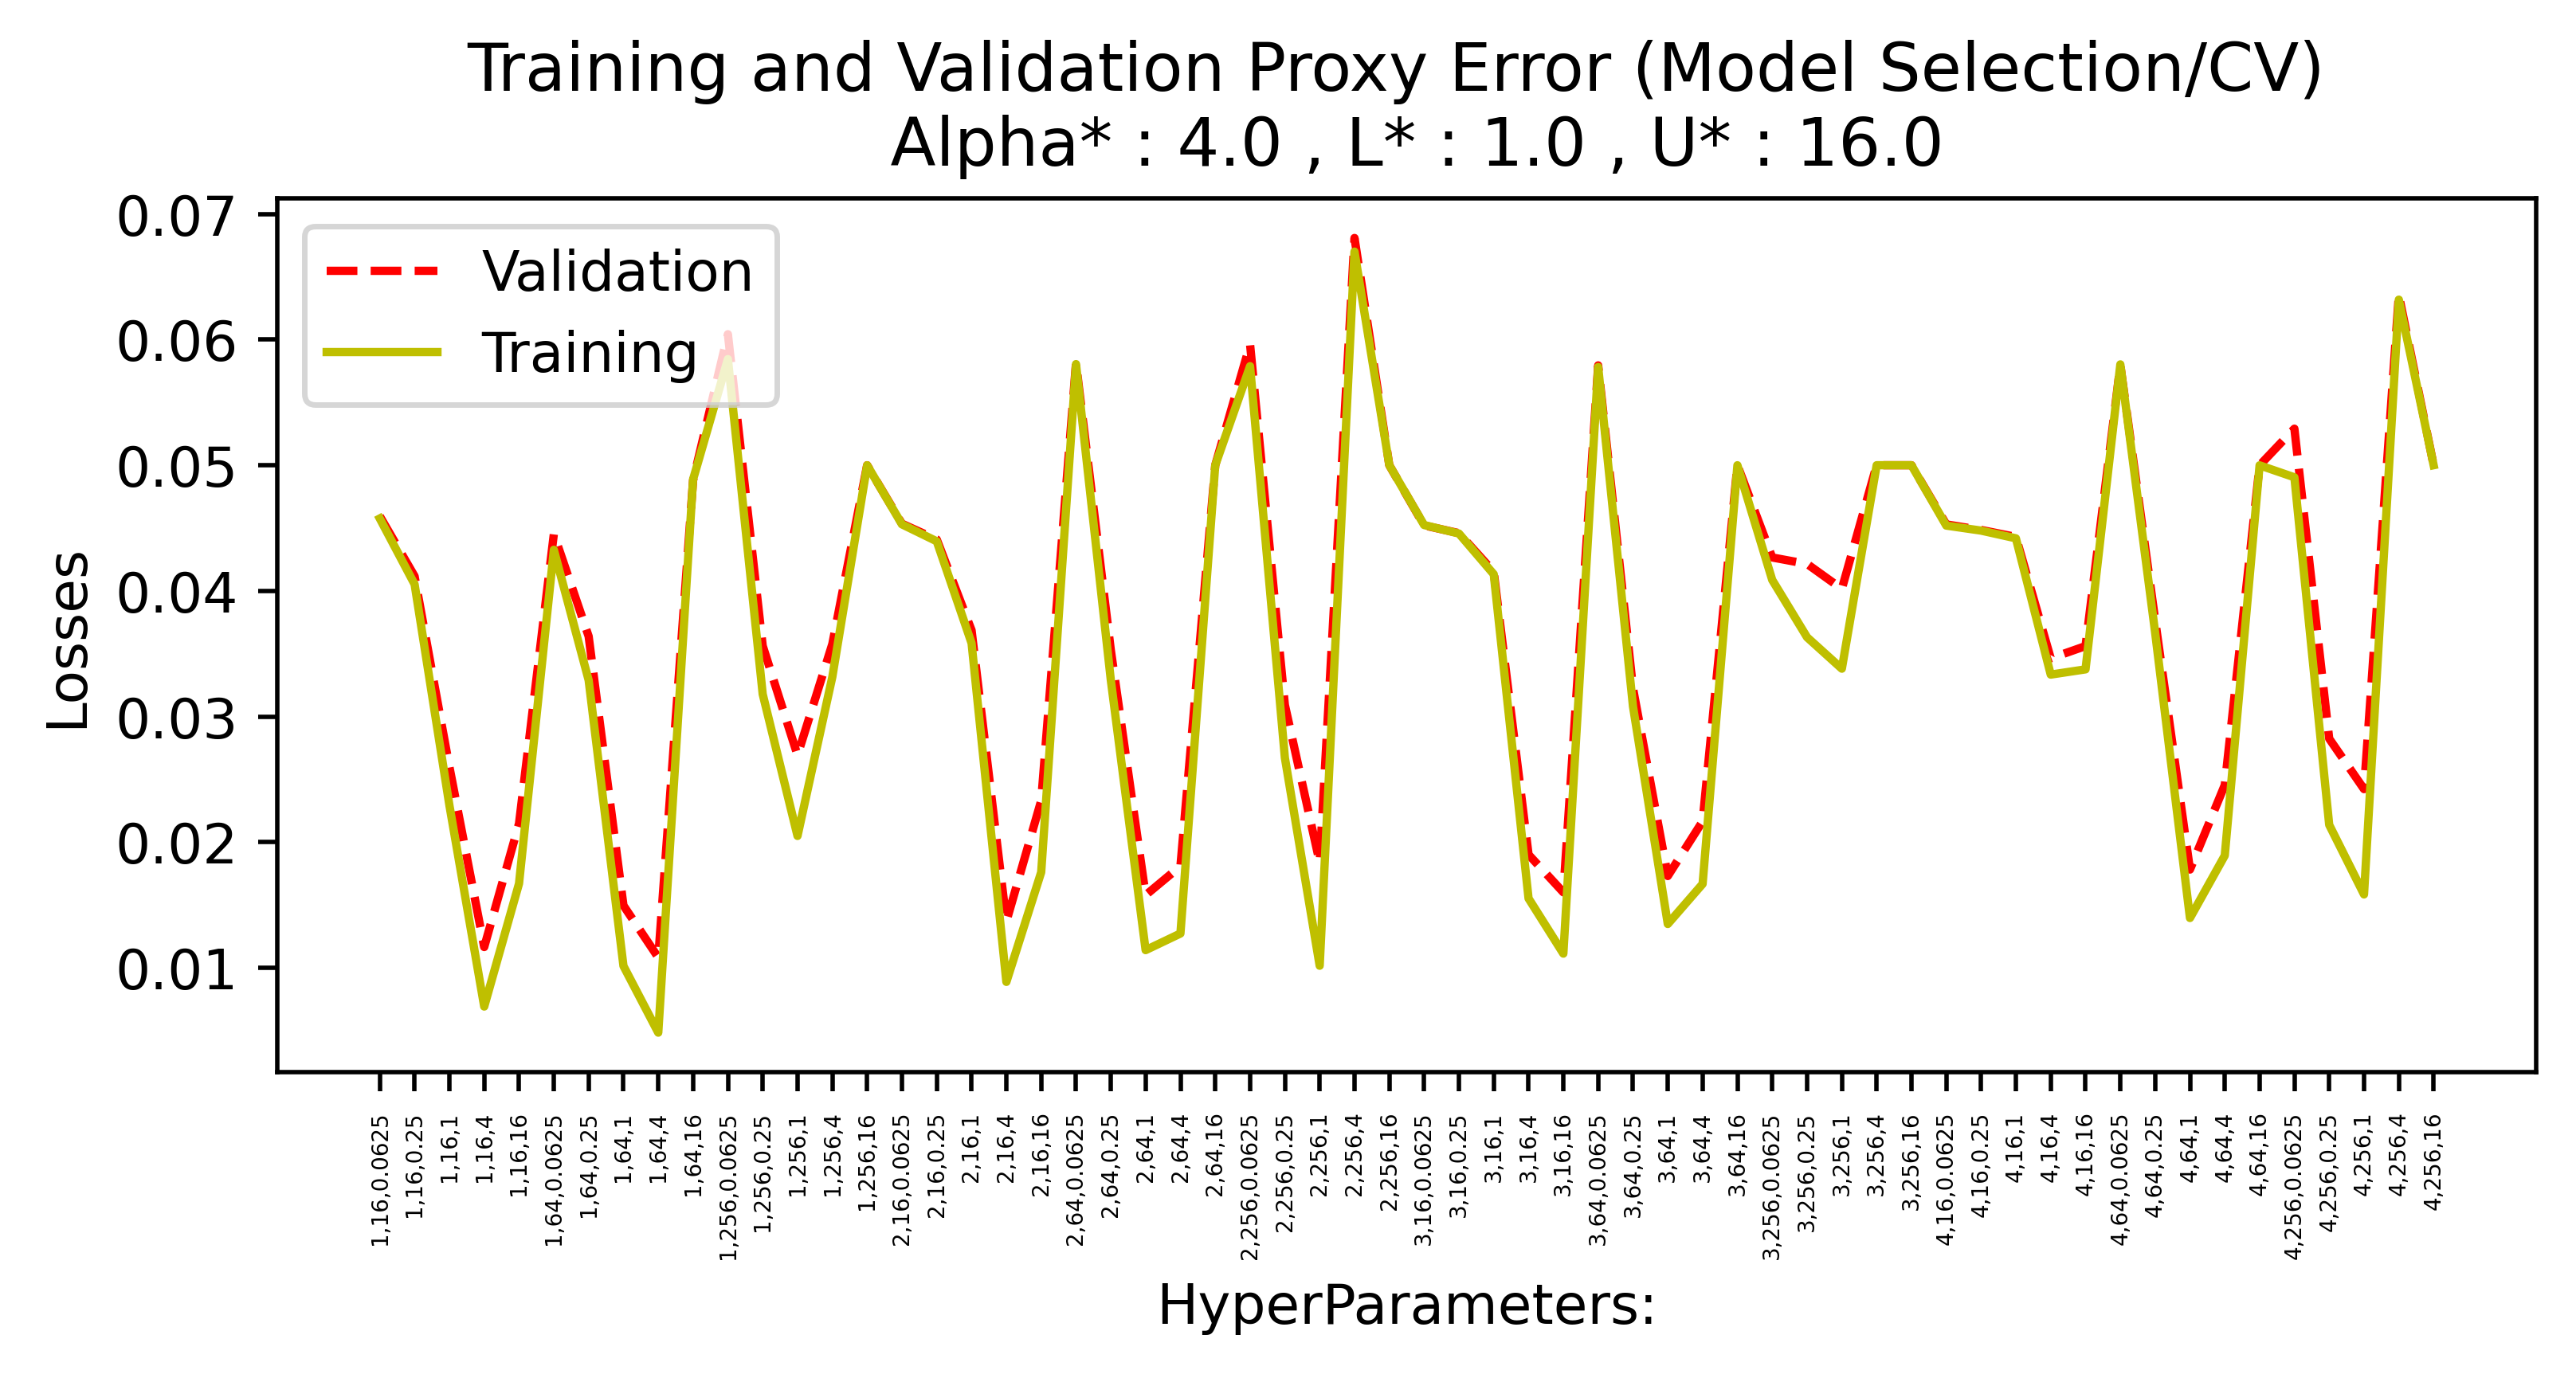

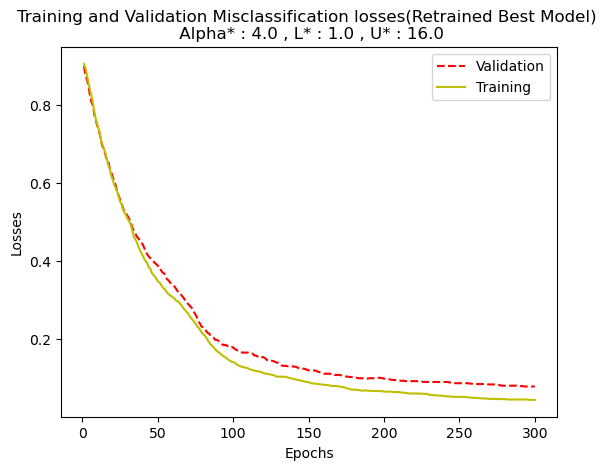

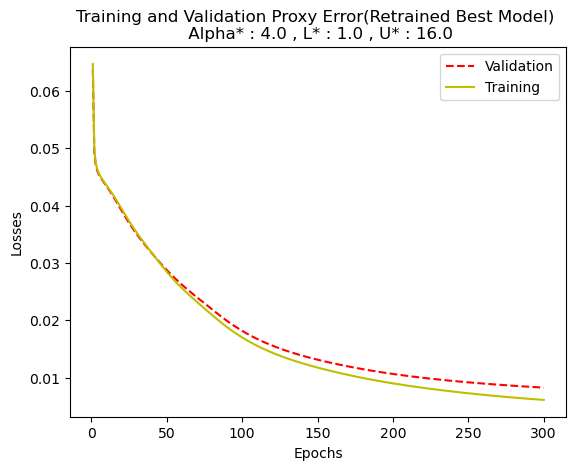

In [3]:
start = time.time()
model = NNet(1024,10)
model2Params = {'lr':[4**-2, 4**-1, 4**0, 4**1, 4**2],'hidL': [1,2,3,4] ,'hidU':[4**2,4**3,4**4]}

print('=========================================================================')
print(' Model Architecture: 2')
print('=========================================================================')
print('\n')
model.model2(model2Params, epochs = 300)

end = time.time()
print('\n Total Time Elapsed in training Model1:', end-start)
print('\n ==> Plotting Results !!!!')

#### Results and Conclusion of Model 2

The learning curves and results for model 2 is printed above.

- The best hyperparameters for the model is found to be 1 Hidden layer, 16 Hidden Units and learning rate of 4. The inferene from this is that higher model complexity with more hidden layers and units is seen to be underperfoming therefore resulting in overfitting and lower evaluation performance when tested against validation/unseen dataset. And higher learning rate fail to capture the global minima due to its long strides during gradient descent.

- The model is trained for 300 iterations and performance appears to be satisfactory and performing with close to 95.5% accuracy based on misclassification error due to the high complexity of the model in contrast to model 1 to learn and capture all the features and non-linearity of the hand written digits. This is also evident when the model is tested against Trial samples.

- Although there is room for increasing the accuracy, increasing the number of epoch adds no value because from the plotting results it is observed that model learning performace (loss curve) is saturating meaning no learning. 

### Model 3: Multi-Layer Perceptron with Two Hidden Layers

 Model Architecture: 3


==> Model Selection......
--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,16,0.015625
--> Time taken to complete above model training:23.36590814590454


--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,16,0.0625
--> Time taken to complete above model training:25.025989770889282


--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,16,0.25
--> Time taken to complete above model training:23.264678239822388


--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,16,1
--> Time taken to complete above model training:28.502322673797607


--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,16,4
--> Time taken to complete above model training:33.36516356468201


--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,64,0.015625
--> Time taken to complete above model training:26.11944317817688


--> CV with hyperparameters [HidU1, HidU2, Alpha]: 64,64,0.0625
--> Time taken to complete above model training:25.438966989517212


--> CV with hyperparameters [

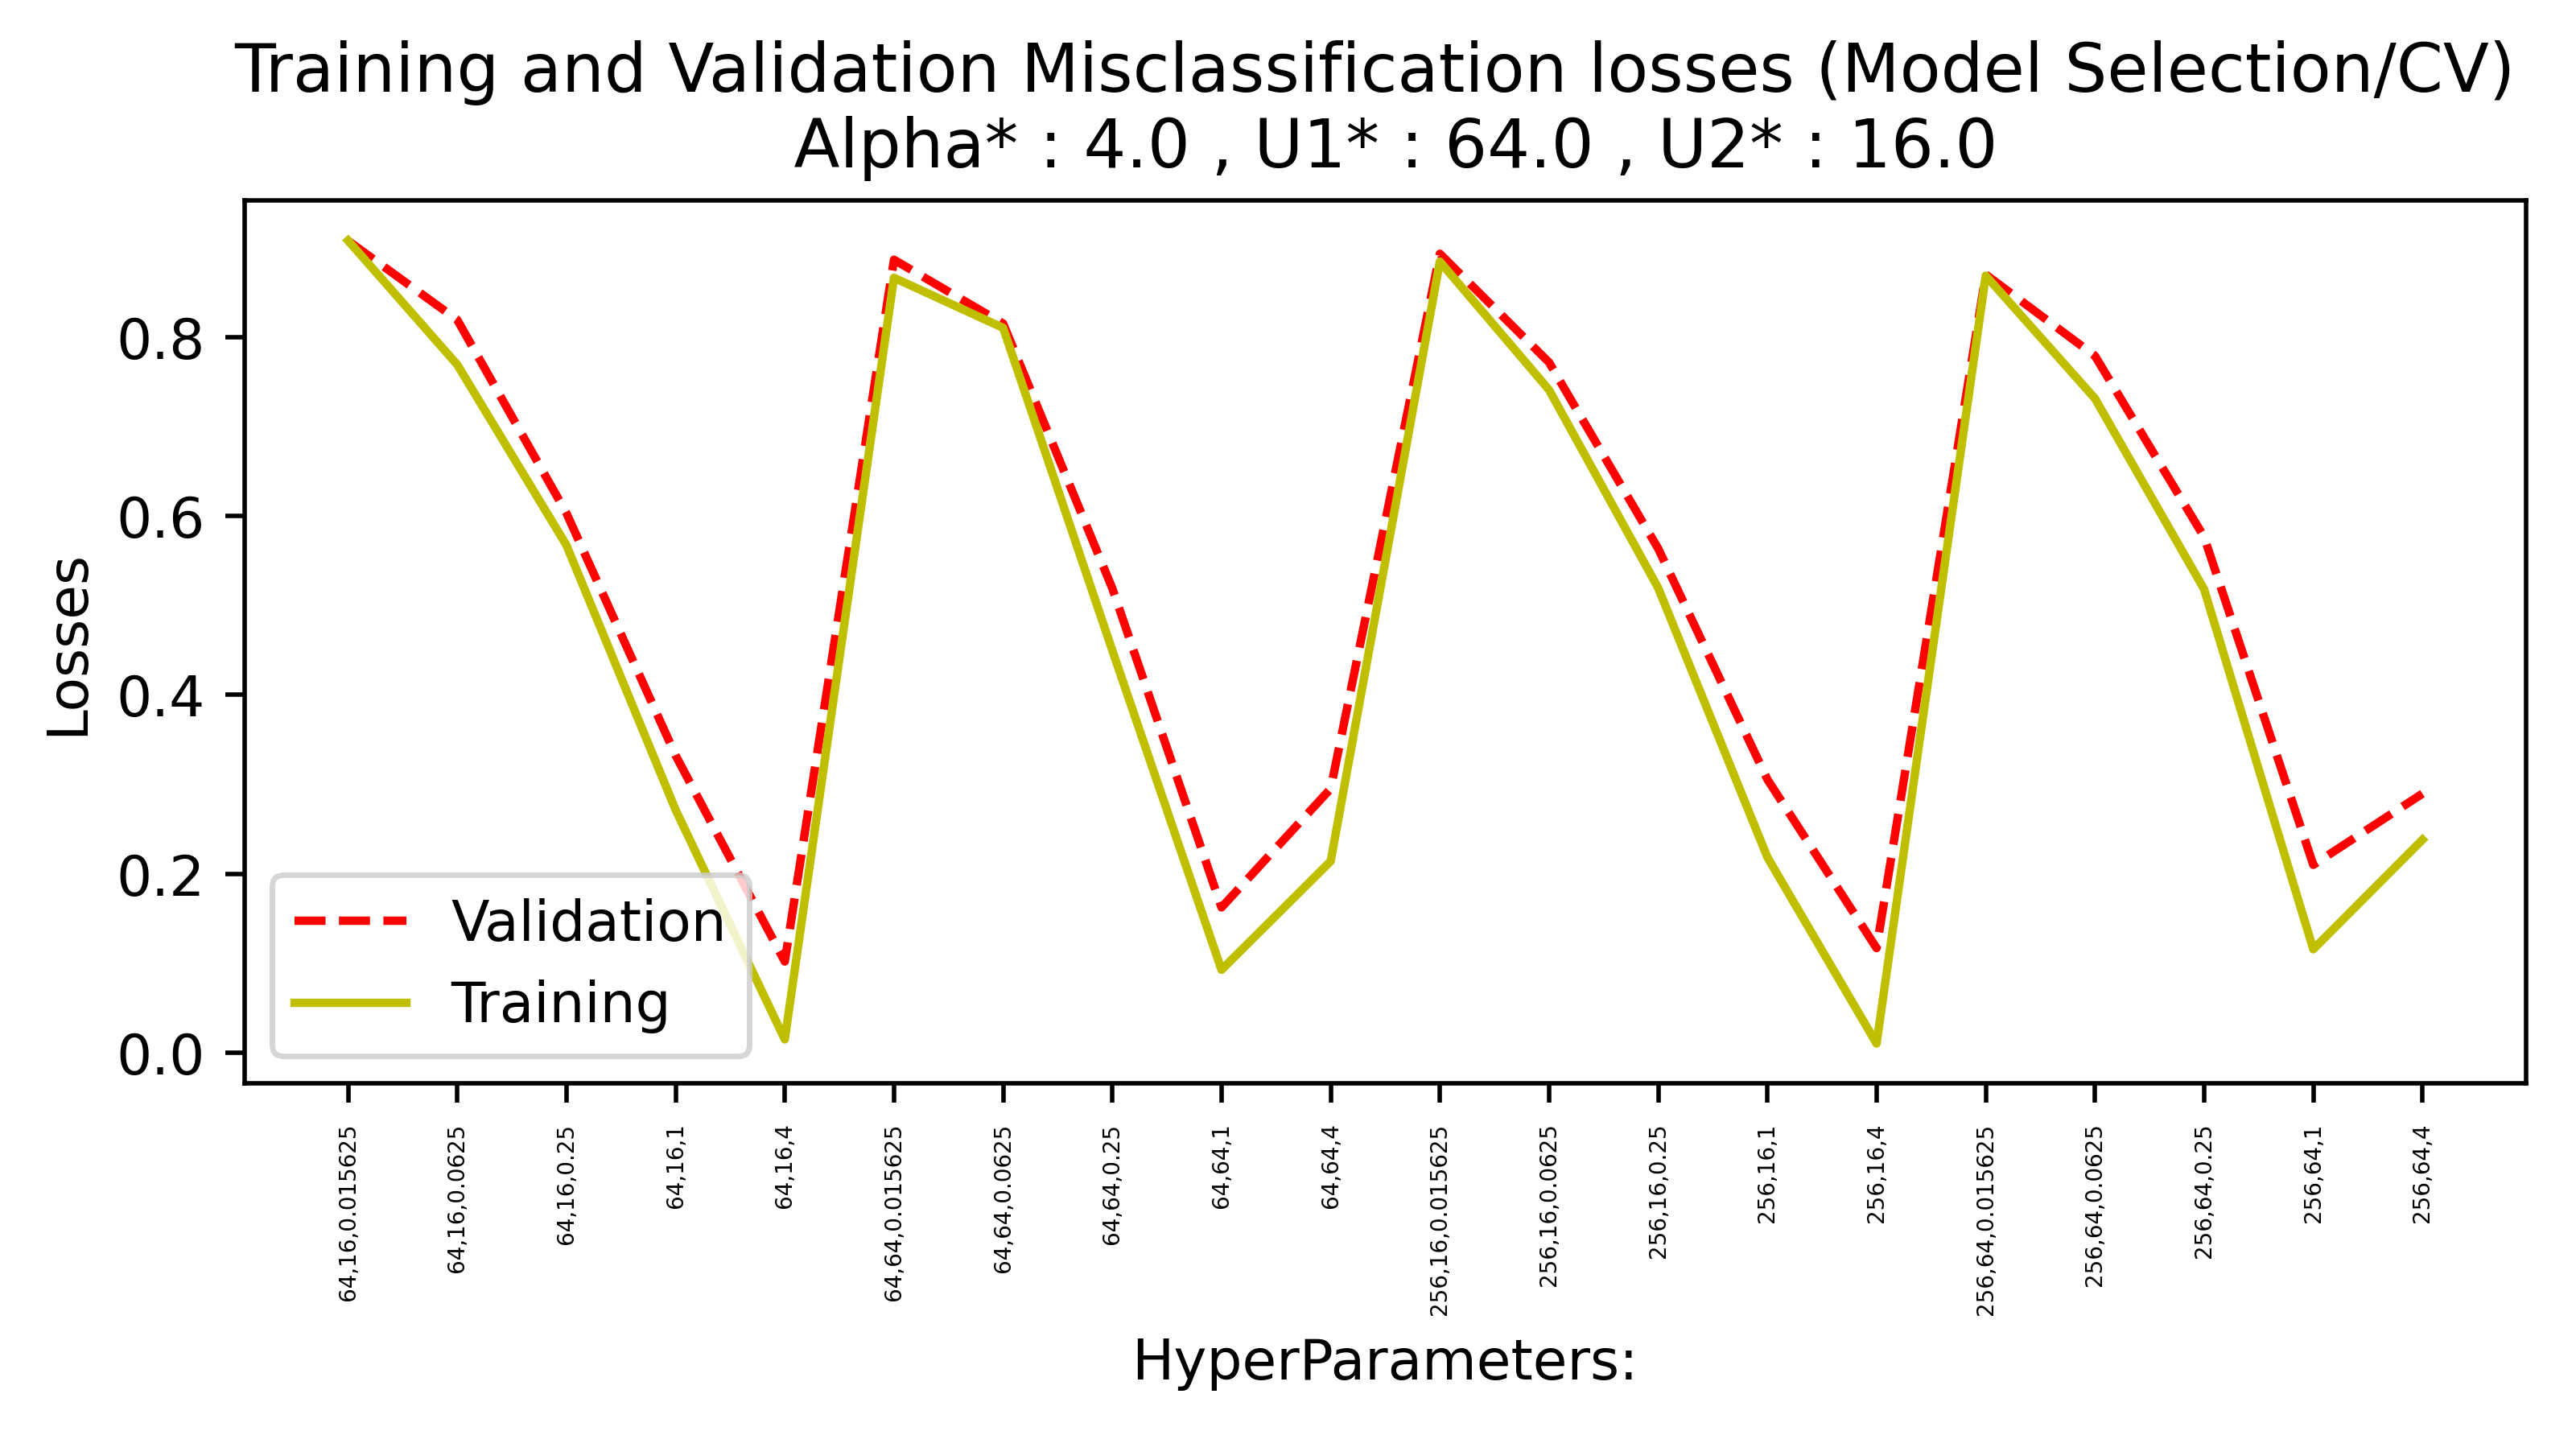

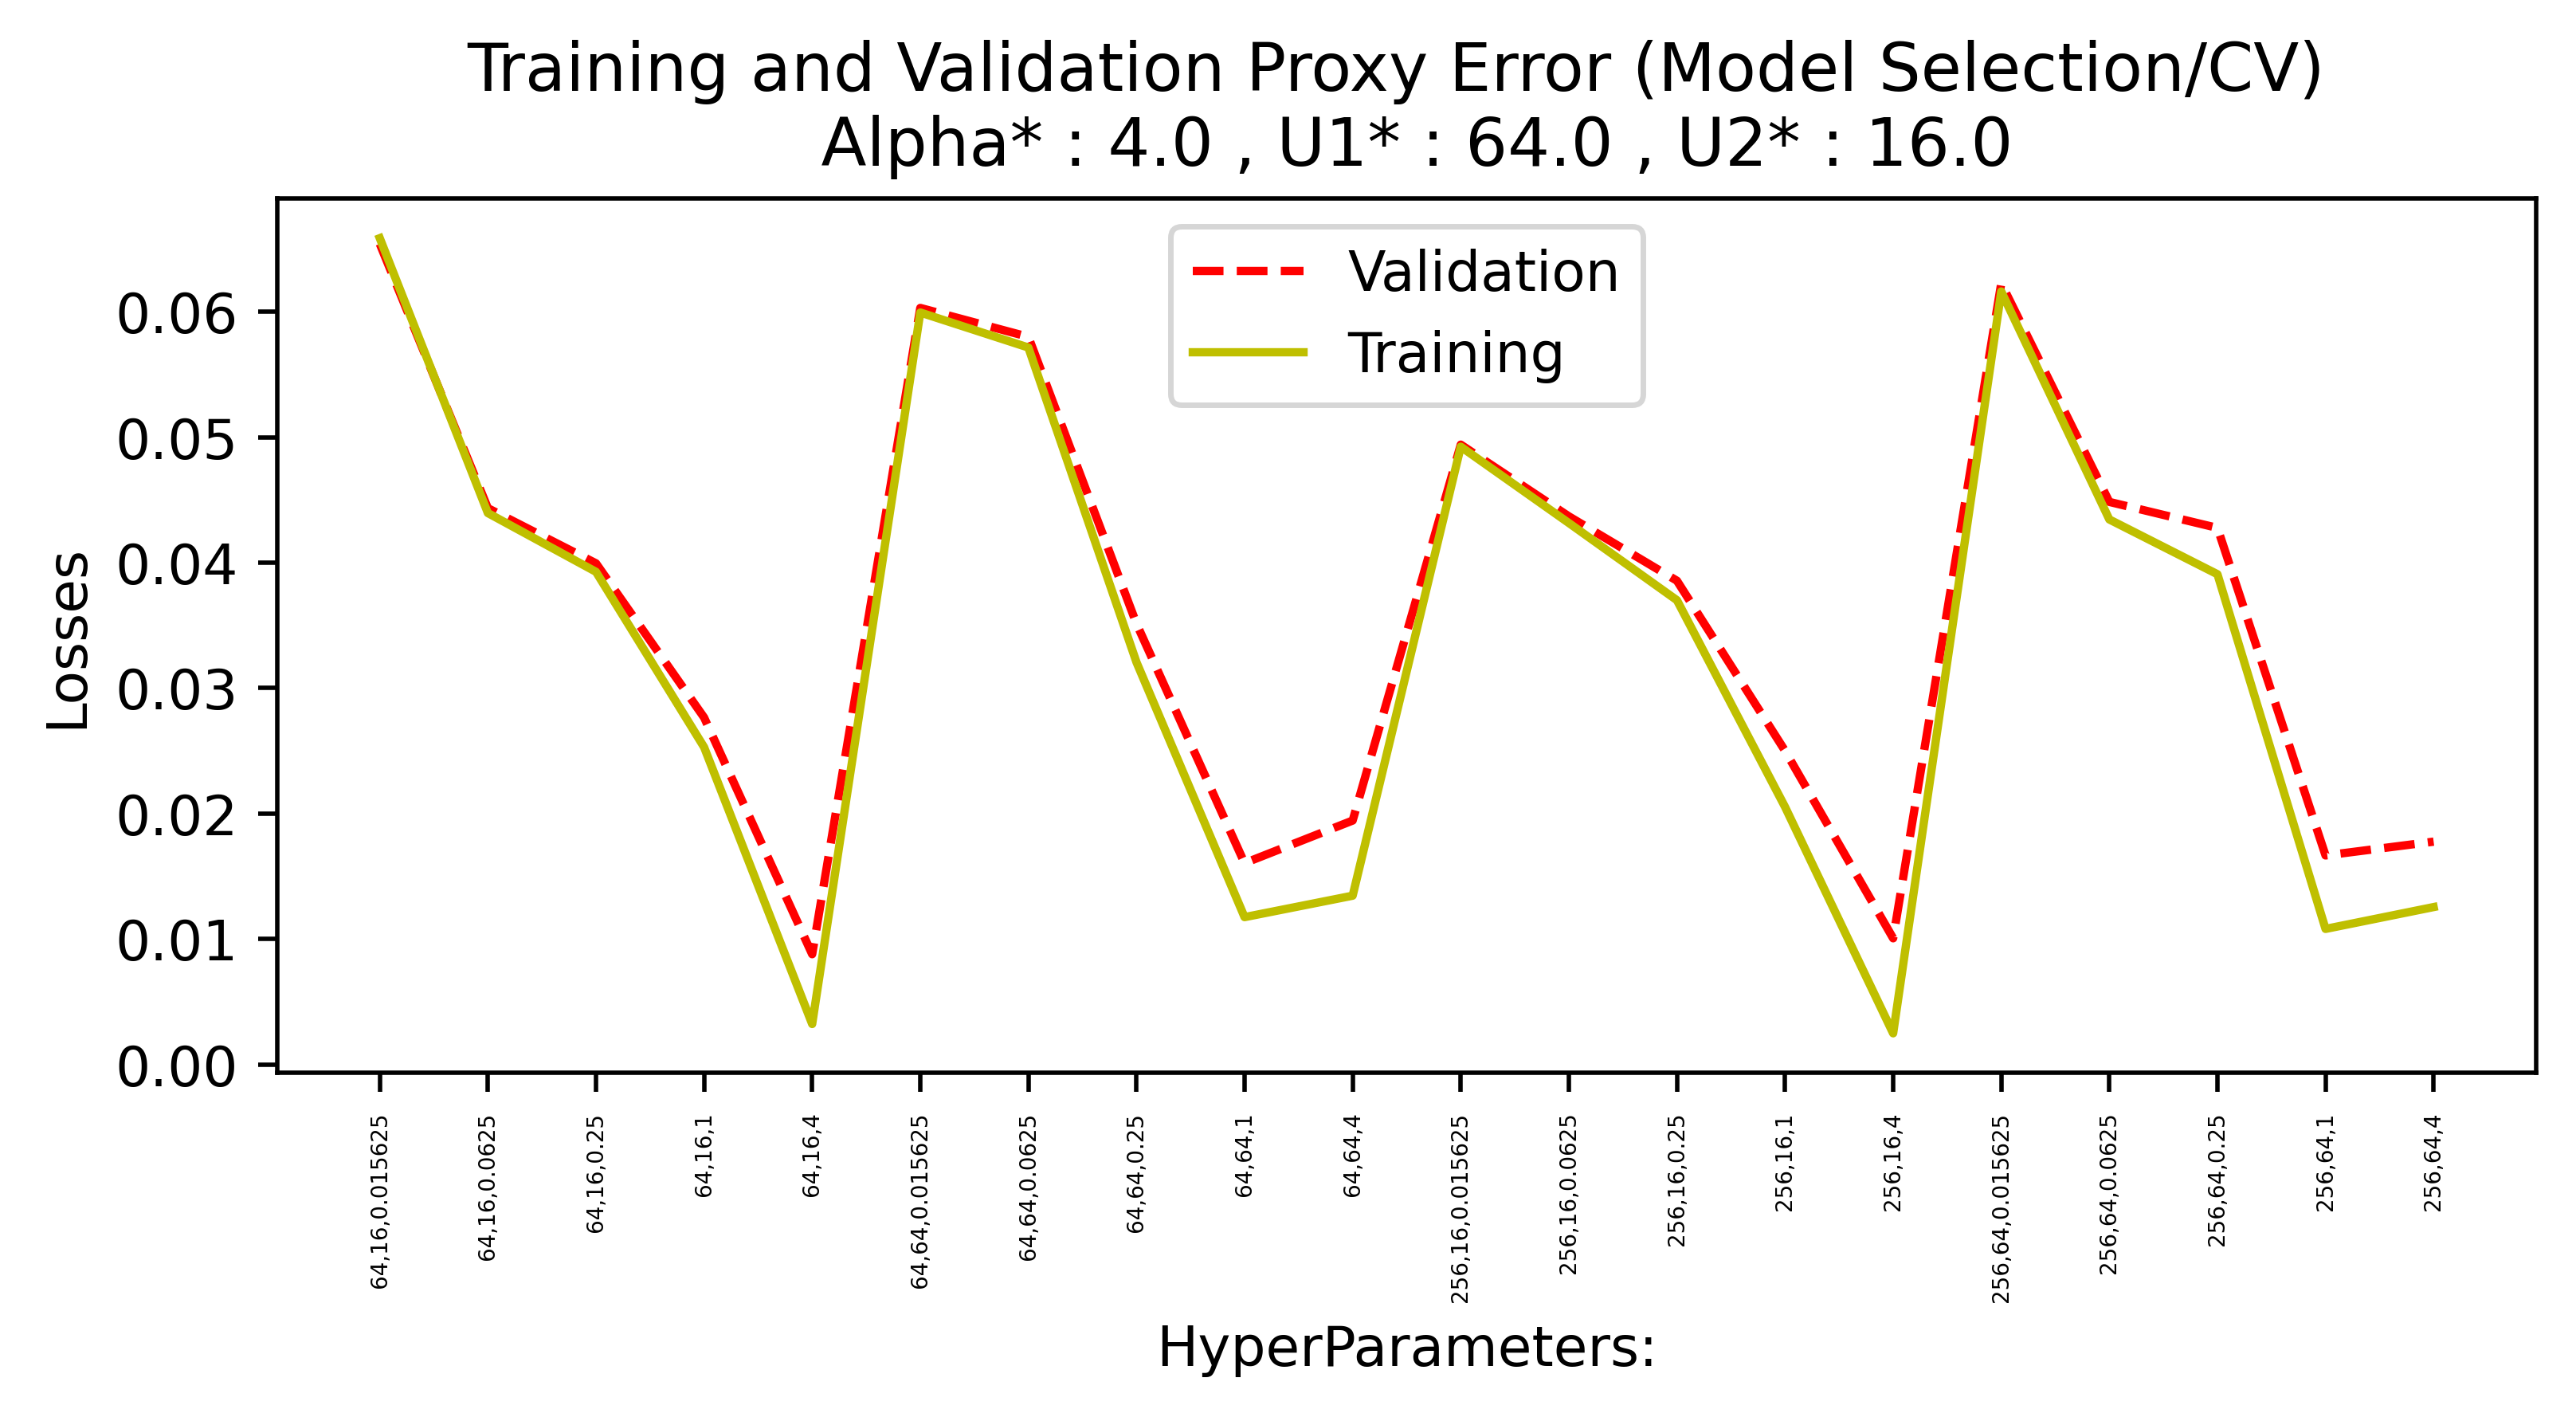

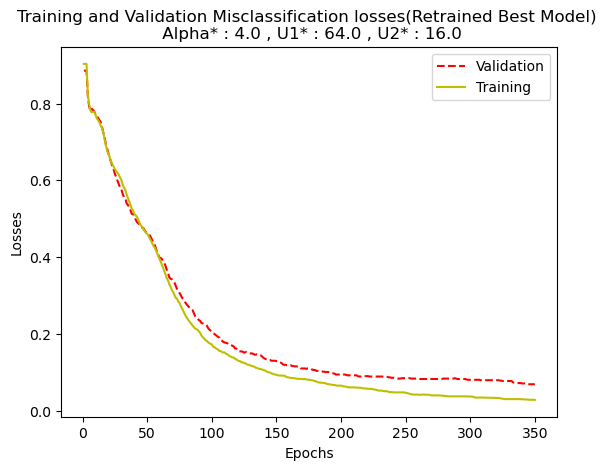

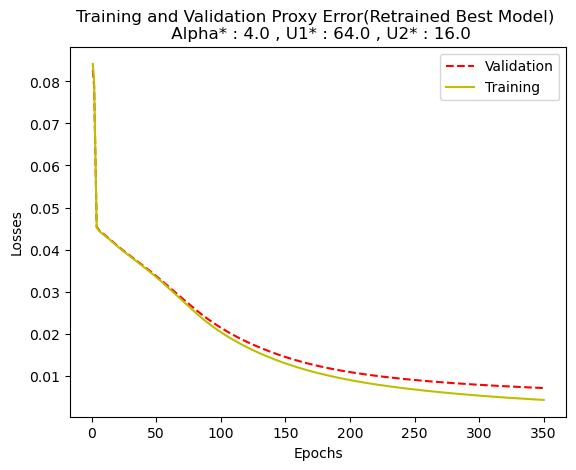

In [7]:
start = time.time()
model = NNet(1024,10)
model3Params = {'lr':[4**-3, 4**-2, 4**-1, 4**0, 4**1],'hidL': 2 ,'hidU':[[4**3,4**4],[4**2,4**3]]}

print('=========================================================================')
print(' Model Architecture: 3')
print('=========================================================================')
print('\n')
model.model3(model3Params, epochs = 350)

end = time.time()
print('\n Total Time Elapsed in training Model1:', end-start)
print('\n ==> Plotting Results !!!!')

#### Results and Conclusion of Model 3

The learning curve and results for model 3 is printed above.

- The best hyperparameters for the model is found to be 2 Hidden layer with 64 and 16 Hidden Units and and learning rate of 4. The inferene from this is that higher model complexity with more hidden units is seen to be underperfoming therefore resulting in overfitting and lower evaluation performance when tested against validation/unseen dataset.

- The model is trained for 350 iterations and performance appears to be satisfactory and performing with close to 97% accuracy based on misclassification error due to the high complexity of the model in contrast to model 1 to learn and capture all the features and non-linearity of the hand written digits. This is also evident when the model is tested against Trial samples. Although this model is complex in its architecture with more hidden layers as opposed to model 2, they both seem to have same performance throwing light to the fact that adding more layers than required adds no significant performace therefore settling to least number of hidden units available in the hyperparameter set during model selection

- Although there is room for increasing the accuracy, increasing the number of epochs adds no value because from the plotting results it is observed that model learning performace(loss curve) is saturating meaning no learning. 

### End of Document